Creating a basic simulation based on the instructions given from RocketPy [here](https://docs.rocketpy.org/en/latest/user/first_simulation.html)

In [3]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

In [4]:
env = Environment(latitude=32.990254, longitude=-106.974998, elevation=1400)

In [5]:
import datetime

tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)  # Hour given in UTC time

In [6]:
env.set_atmospheric_model(type="Forecast", file="GFS")


Gravity Details

Acceleration of gravity at surface level:    9.7911 m/s²
Acceleration of gravity at  79.114 km (ASL): 9.5560 m/s²


Launch Site Details

Launch Date: 2024-10-30 12:00:00 UTC
Launch Site Latitude: 32.99025°
Launch Site Longitude: -106.97500°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 315468.64 W    3651938.65 N
Launch Site UTM zone: 13S
Launch Site Surface Elevation: 1471.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.114 km
Forecast Time Period: from 2024-10-29 12:00:00 to 2024-11-14 12:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 217.34 m/s
Surface Wind Direction: 37.34°
Surface Wind Heading: 2.55°
Surface Pressure: 850.75 hPa
Surface Temperature: 282.21 K
Surface Air Density: 1.050 kg/m³
Surface Speed of Sound: 336.77 m/s


Earth Model Details

Earth Radius at Launch 

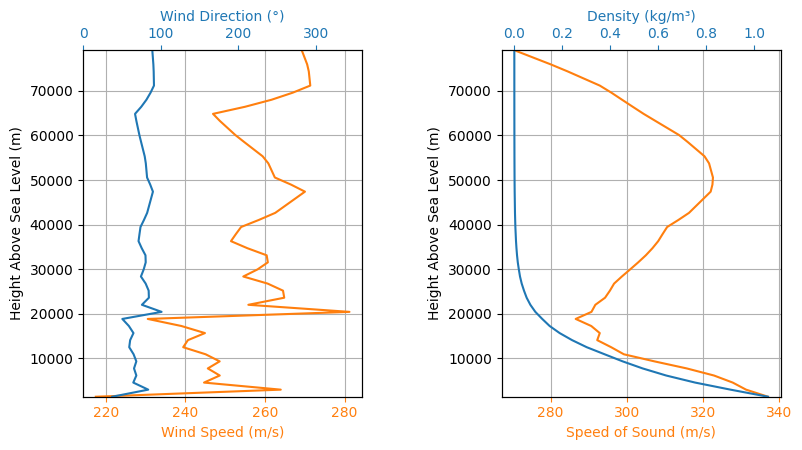

In [7]:
env.info()

Creating a solid motor based on the Cesaroni 6026M1670-P. I found the `eng` file here: https://www.thrustcurve.org/motors/Cesaroni/6026M1670-P/

In [8]:
motor = SolidMotor(
    thrust_source="Cesaroni_6026M1670-P.eng",  # Path to the eng file relative to this file 
    dry_mass=1.815,
    dry_inertia=(0.125, 0.125, 0.002),
    nozzle_radius=33 / 1000,
    grain_number=5,
    grain_density=1815,
    grain_outer_radius=33 / 1000,
    grain_initial_inner_radius=15 / 1000,
    grain_initial_height=120 / 1000,
    grain_separation=5 / 1000,
    grains_center_of_mass_position=0.397,
    center_of_dry_mass_position=0.317,
    nozzle_position=0,
    burn_time=3.9,
    throat_radius=11 / 1000,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

Nozzle Details
Nozzle Radius: 0.033 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.591 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Average Propellant Exhaust Velocity: 2038.745 m/s
Average Thrust: 1545.218 N
Maximum Thrust: 2200.0 N at 0.15 s after ignition.
Total Impulse: 6026.350 Ns



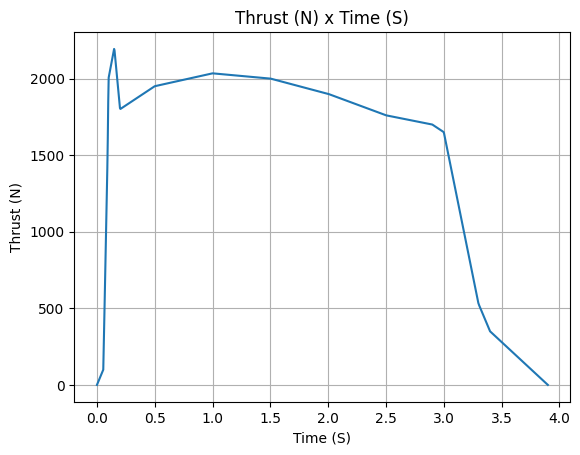

In [9]:
motor.info()

In [10]:
my_rocket = Rocket(
    radius=127 / 2000,
    mass=14.426,
    inertia=(6.321, 6.321, 0.034),
    power_off_drag=.1,
    power_on_drag=.1,
    center_of_mass_without_motor=0,
    coordinate_system_orientation="tail_to_nose",
)

In [11]:
my_rocket.add_motor(motor, position=-1.255)

In [12]:
nose_cone = my_rocket.add_nose(
    length=0.55829, kind="von karman", position=1.278
)

fin_set = my_rocket.add_trapezoidal_fins(
    n=4,
    root_chord=0.120,
    tip_chord=0.060,
    span=0.110,
    position=-1.04956,
    cant_angle=0.5,
    airfoil=0,
)

tail = my_rocket.add_tail(
    top_radius=0.0635, bottom_radius=0.0435, length=0.060, position=-1.194656
)

Adding parachutes

In [13]:
main = my_rocket.add_parachute(
    name="main",
    cd_s=10.0,
    trigger=800,      # ejection altitude in meters
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

drogue = my_rocket.add_parachute(
    name="drogue",
    cd_s=1.0,
    trigger="apogee",  # ejection at apogee
    sampling_rate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Seeing if the rocket is stable

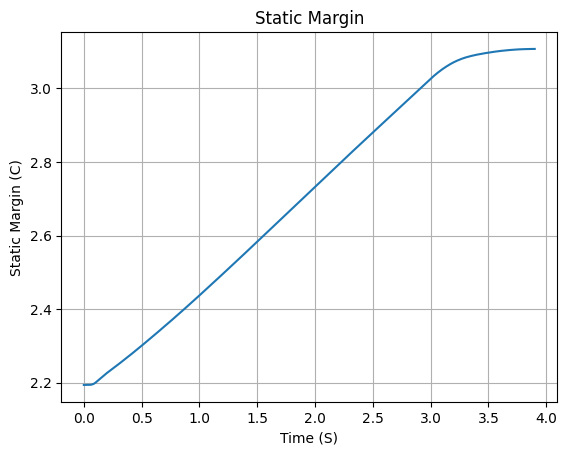

In [14]:
my_rocket.plots.static_margin()

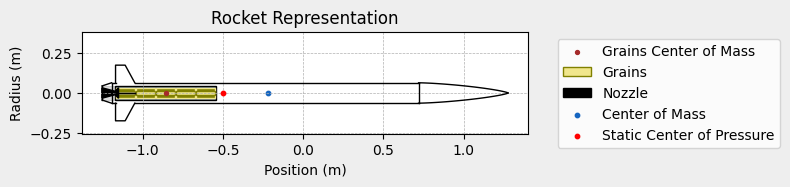

In [15]:
my_rocket.draw()

In [16]:
test_flight = Flight(
    rocket=my_rocket, environment=env, rail_length=5.2, inclination=85, heading=0
    )


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 1471.47 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: 0.999 | e1: -0.044 | e2: 0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 2.194 c

Surface Wind Conditions

Frontal Surface Wind Speed: 2.03 m/s
Lateral Surface Wind Speed: -1.55 m/s

Burn out State

Burn out time: 3.900 s
Altitude at burn out: 2147.557 m (ASL) | 676.091 m (AGL)
Rocket speed at burn out: 297.244 m/s
Freestream velocity at burn out: 297.624 m/s
Mach Number at burn out: 0.889
Kinetic energy at burn out: 7.175e+05 J

Apogee State

Apogee Time: 31.659 s
Apogee Altitude: 6061.414 m (ASL) | 4589.948 m (AGL)
Apogee Freestream Speed: 40.353 m/s
Apogee X position: -203.353 m
Apogee Y position: 716.213 m
Apogee latitude: 32.9966942°
Apogee longitude: -106.9771782°


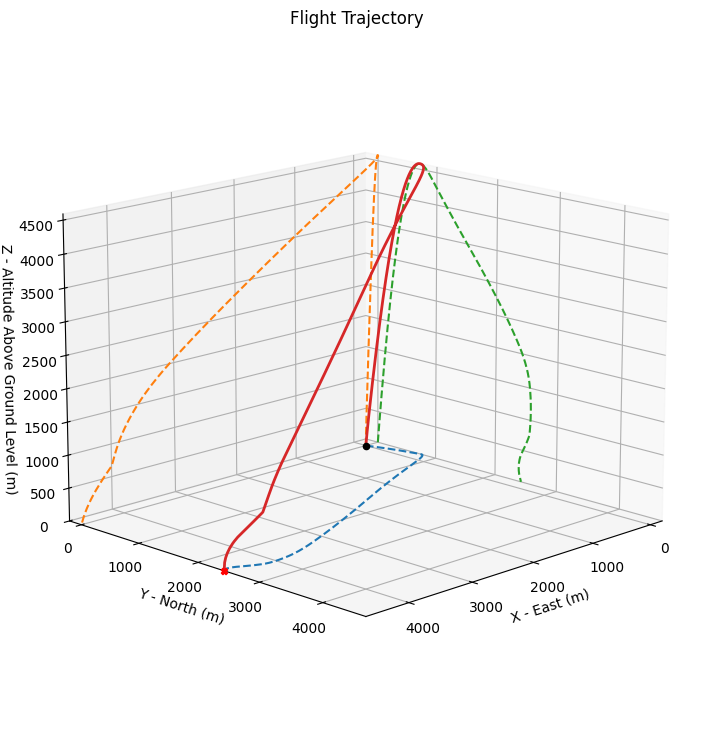

In [17]:
test_flight.prints.initial_conditions()
test_flight.prints.surface_wind_conditions()
test_flight.prints.burn_out_conditions()
test_flight.prints.apogee_conditions()
test_flight.plots.trajectory_3d()
test_flight.export_data('testFlight.csv')

In [18]:
test_flight.prints.surface_wind_conditions()


Surface Wind Conditions

Frontal Surface Wind Speed: 2.03 m/s
Lateral Surface Wind Speed: -1.55 m/s


In [19]:
test_flight.prints.burn_out_conditions()


Burn out State

Burn out time: 3.900 s
Altitude at burn out: 2147.557 m (ASL) | 676.091 m (AGL)
Rocket speed at burn out: 297.244 m/s
Freestream velocity at burn out: 297.624 m/s
Mach Number at burn out: 0.889
Kinetic energy at burn out: 7.175e+05 J


In [20]:
test_flight.prints.apogee_conditions()


Apogee State

Apogee Time: 31.659 s
Apogee Altitude: 6061.414 m (ASL) | 4589.948 m (AGL)
Apogee Freestream Speed: 40.353 m/s
Apogee X position: -203.353 m
Apogee Y position: 716.213 m
Apogee latitude: 32.9966942°
Apogee longitude: -106.9771782°


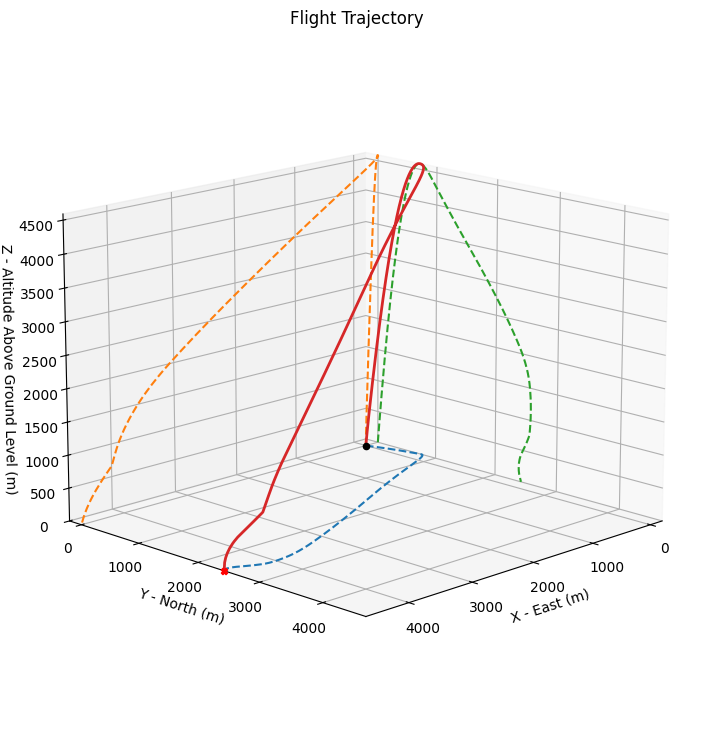

In [21]:
test_flight.plots.trajectory_3d()